<a href="https://colab.research.google.com/github/OoMyGit/Data-Mining/blob/main/%5BAnswer%5D_Exercise_Week_9_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kwandy Chandra - 0706022210001

## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [870]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [871]:
# load dataset and show the first five sample
df = pd.read_csv('https://raw.githubusercontent.com/OoMyGit/Dataset-DataMining/refs/heads/main/property_dataset.csv')
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [872]:
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,307.000000,306.000000,306.000000
mean,226.908795,266.579805,4.276873,3.339869,1.856209
std,202.149571,213.501196,1.646412,1.632311,0.512702
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.000000,200.000000,4.000000,3.000000,2.000000
75%,286.000000,332.500000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


In [873]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [874]:
df.isnull().sum()

,0
Area Category,1
Nama Daerah,1
Luas Tanah (m2),1
Luas Bangunan (m2),1
Jumlah Kamar,1
Jumlah Kamar Mandi,2
Tingkat/Lantai,2
Harga Penawaran (dari Owner),1
Terjual/Belum,1
Arah Hadap Rumah,83


2.

In [875]:
df.isna().mean()*100

,0
Area Category,0.324675
Nama Daerah,0.324675
Luas Tanah (m2),0.324675
Luas Bangunan (m2),0.324675
Jumlah Kamar,0.324675
Jumlah Kamar Mandi,0.649351
Tingkat/Lantai,0.649351
Harga Penawaran (dari Owner),0.324675
Terjual/Belum,0.324675
Arah Hadap Rumah,26.948052




```
# This is formatted as code
```

Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [876]:
imputer = SimpleImputer(strategy='most_frequent')

df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [877]:
df.isnull().sum()

,0
Area Category,0
Nama Daerah,0
Luas Tanah (m2),0
Luas Bangunan (m2),0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran (dari Owner),0
Terjual/Belum,0
Arah Hadap Rumah,0


Drop the column 'Nama Daerah' because all the values are different.

In [878]:
df.drop('Nama Daerah', axis=1, inplace=True)
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


3.

In [879]:
le = LabelEncoder()
df['Area Category'] = df['Area Category'].map({'Sangat Premium': 1, 'Premium': 2, 'Standard': 3, 'Below Standard': 4})
df['Terjual/Belum'] = df['Terjual/Belum'].map({'Terjual': 0, 'Belum': 1})
df['Arah Hadap Rumah'] = le.fit_transform(df['Arah Hadap Rumah'])
df['Posisi Rumah'] = le.fit_transform(df['Posisi Rumah'])
df['Lebar Jalan Depan Rumah (ROW)'] = df['Lebar Jalan Depan Rumah (ROW)'].map({'< 1 Mobil': 1, '1-2 Mobil': 2, '> 2 Mobil': 3})
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,1,3,2,2
1,4,30.0,60.0,2.0,1.0,2.0,287799000,1,3,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,1,1,0,2
3,1,187.0,250.0,5.0,5.0,2.0,3100000000,1,3,2,2
4,2,350.0,600.0,5.0,5.0,2.0,5000000000,1,0,2,2


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [880]:
# prompt: To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:
# Replace empty values (" ") with "10500000000".
# Replace values with commas like "10.500.000.000,00" with "10500000000".

df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].replace(' ', '10500000000')
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].str.replace('.', '', regex=False)
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].str.replace(',', '', regex=False)
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].fillna(10500000000)
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,1,3,2,2
1,4,30.0,60.0,2.0,1.0,2.0,287799000,1,3,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,1,1,0,2
3,1,187.0,250.0,5.0,5.0,2.0,3100000000,1,3,2,2
4,2,350.0,600.0,5.0,5.0,2.0,5000000000,1,0,2,2


check the data type

In [881]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    int64 
 1   Luas Tanah (m2)                308 non-null    object
 2   Luas Bangunan (m2)             308 non-null    object
 3   Jumlah Kamar                   308 non-null    object
 4   Jumlah Kamar Mandi             308 non-null    object
 5   Tingkat/Lantai                 308 non-null    object
 6   Harga Penawaran (dari Owner)   308 non-null    object
 7   Terjual/Belum                  308 non-null    int64 
 8   Arah Hadap Rumah               308 non-null    int64 
 9   Posisi Rumah                   308 non-null    int64 
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 26.6+ KB


Change the data types from:

- float to int
- object to int

In [882]:
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].astype(int)
df['Luas Tanah (m2)'] = df['Luas Tanah (m2)'].astype(int)
df['Luas Bangunan (m2)'] = df['Luas Bangunan (m2)'].astype(int)
df['Jumlah Kamar'] = df['Jumlah Kamar'].astype(int)
df['Jumlah Kamar Mandi'] = df['Jumlah Kamar Mandi'].astype(int)
df['Tingkat/Lantai '] = df['Tingkat/Lantai '].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    int64
 1   Luas Tanah (m2)                308 non-null    int64
 2   Luas Bangunan (m2)             308 non-null    int64
 3   Jumlah Kamar                   308 non-null    int64
 4   Jumlah Kamar Mandi             308 non-null    int64
 5   Tingkat/Lantai                 308 non-null    int64
 6   Harga Penawaran (dari Owner)   308 non-null    int64
 7   Terjual/Belum                  308 non-null    int64
 8   Arah Hadap Rumah               308 non-null    int64
 9   Posisi Rumah                   308 non-null    int64
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64
dtypes: int64(11)
memory usage: 26.6 KB


4.

In [883]:
# scaling data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,0.494434,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,0.0,0.839497,-0.188069,-0.598758
1,1.742677,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0.0,0.839497,-0.188069,-2.406773
2,0.494434,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,0.0,-1.141845,-5.453988,-0.598758
3,-2.002052,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,0.0,0.839497,-0.188069,-0.598758
4,-0.753809,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,0.0,-2.132516,-0.188069,-0.598758


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

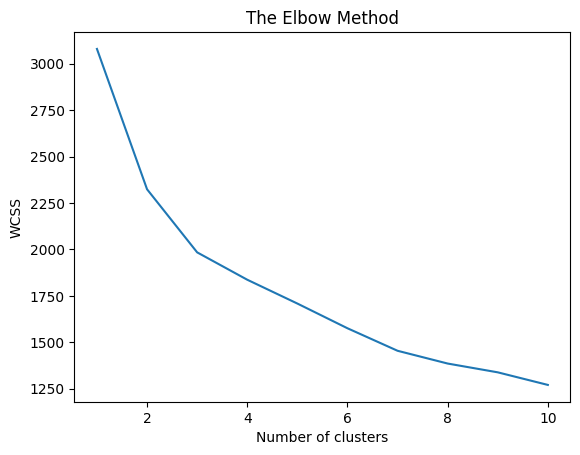

In [884]:

wcss = []
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [885]:
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print(f"The optimal k of model is: {kl.elbow}")

The optimal k of model is: 3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [886]:
kmeans = KMeans(n_clusters=kl.elbow, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)
y_pred

array([0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 0,
       0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0,
       1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 2,

In [887]:
# Inverse transform the scaled data to get the original values

original_data = scaler.inverse_transform(df_scaled)
df_inverse = pd.DataFrame(original_data, columns=df_scaled.columns)

df_inverse['KMeans'] = y_pred
df_inverse.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,0
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,0
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,0
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,0


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [888]:
# aggregation
# For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
# For continuous columns: mean.
# Cluster results: count.

cluster_summary = df_inverse.groupby('KMeans').agg(
    {
    'Area Category': [pd.Series.mode,'min','max'],
    'Luas Tanah (m2)':  ['mean','min','max'],
    'Luas Bangunan (m2)': ['mean','min','max'],
    'Jumlah Kamar': [pd.Series.mode,'min','max'],
    'Jumlah Kamar Mandi': [pd.Series.mode,'min','max'],
    'Tingkat/Lantai ': [pd.Series.mode,'min','max'],
    'Harga Penawaran (dari Owner)': ['mean','min','max'],
    'Terjual/Belum': [pd.Series.mode,'min','max'],
    'Arah Hadap Rumah': [pd.Series.mode,'min','max'],
    'Posisi Rumah': [pd.Series.mode,'min','max'],
    'Lebar Jalan Depan Rumah (ROW)': [pd.Series.mode,'min','max']
    }
  )

cluster_summary = cluster_summary.T

cluster_summary.columns = [f'Cluster {i}' for i in range(cluster_summary.shape[1])]

cluster_summary.columns.name = 'KMeans'

cluster_summary

KMeans                                      Cluster 0           Cluster 1  \
Area Category                 mode                2.0                 1.0   
                              min                 1.0                 1.0   
                              max                 4.0                 4.0   
Luas Tanah (m2)               mean         187.378205              570.68   
                              min                50.0               240.0   
                              max               525.0              1561.0   
Luas Bangunan (m2)            mean         243.814103              642.22   
                              min                75.0               350.0   
                              max               600.0              1200.0   
Jumlah Kamar                  mode                4.0                 5.0   
                              min                 3.0                 3.0   
                              max                 9.0                13.0   
Jumlah Kamar Mandi            mode                4.0                 5.0   
                              min                 1.0                 2.0   
                              max                 7.0                13.0   
Tingkat/Lantai                mode                2.0                 2.0   
                              min                 1.0                 1.0   
                              max                 3.0                 4.0   
Harga Penawaran (dari Owner)  mean  3544236467.205128  16756299779.959999   
                              min         645000000.0        2750000000.0   
                              max       19500000000.0       99000000000.0   
Terjual/Belum                 mode                1.0                 1.0   
                              min                 1.0                 1.0   
                              max                 1.0                 1.0   
Arah Hadap Rumah              mode                3.0                 3.0   
                              min                 0.0                 0.0   
                              max                 3.0                 3.0   
Posisi Rumah                  mode                2.0                 2.0   
                              min                 0.0                 0.0   
                              max                 3.0                 4.0   
Lebar Jalan Depan Rumah (ROW) mode                2.0                 3.0   
                              min                 2.0                 2.0   
                              max                 3.0                 3.0   

KMeans                                      Cluster 2  
Area Category                 mode                3.0  
                              min                 2.0  
                              max                 4.0  
Luas Tanah (m2)               mean         118.980392  
                              min                14.0  
                              max               495.0  
Luas Bangunan (m2)            mean         117.588235  
                              min                14.0  
                              max               495.0  
Jumlah Kamar                  mode                2.0  
                              min                 1.0  
                              max                 5.0  
Jumlah Kamar Mandi            mode                2.0  
                              min                 1.0  
                              max                 4.0  
Tingkat/Lantai                mode         [1.0, 2.0]  
                              min                 1.0  
                              max                 2.0  
Harga Penawaran (dari Owner)  mean  1506754456.117647  
                              min         160000000.0  
                              max       10500000000.0  
Terjual/Belum                 mode                1.0  
                              min                 1.0  
                              max    

In [889]:
# count data from each cluster
cluster_counts = df_inverse['KMeans'].value_counts().sort_index()
cluster_counts.name = 'KMeans'
cluster_counts

,KMeans
KMeans,
0,156
1,50
2,102


In [890]:
# write down your interpretation from the cluster that you have been made

# Cluster 0:
#     * It appears to represent properties with a relatively lower mean price (`Harga Penawaran (dari Owner)`), possibly in a less desirable area or with smaller land and building sizes.
#     *  Observe the mode values for categorical features like `Area Category`, `Jumlah Kamar` (number of rooms), `Jumlah Kamar Mandi` (number of bathrooms), `Terjual/Belum` (sold or not), `Arah Hadap Rumah`, `Posisi Rumah`, and `Lebar Jalan Depan Rumah (ROW)`. This gives insight into the typical characteristics within this group. For example, most properties in this cluster might have a certain `Area Category`, a specific number of rooms, and face a particular direction.
# Cluster 1:
#     * It likely contains properties with a higher mean price (`Harga Penawaran (dari Owner)`) compared to Cluster 0.
#     * Examine the mode and mean values for the features to understand the typical properties found in this cluster. They might be larger in terms of land and building area, potentially with more rooms and bathrooms.
#     * The `Terjual/Belum` mode can also indicate if properties in this cluster tend to sell faster or not.
# Cluster 2:
#     * Similar to other clusters, analyze the mode and mean values for the features in this cluster. It might represent properties with a specific set of characteristics in terms of price, size, location, or other features that distinguish it from the other clusters.

# By analyzing the cluster summary (mode, mean, and count) alongside visualizations and potential feature importance evaluations, you gain a deeper understanding of the property groupings. You can then use these insights to inform business decisions related to real estate investments, marketing strategies, or understanding property market trends.

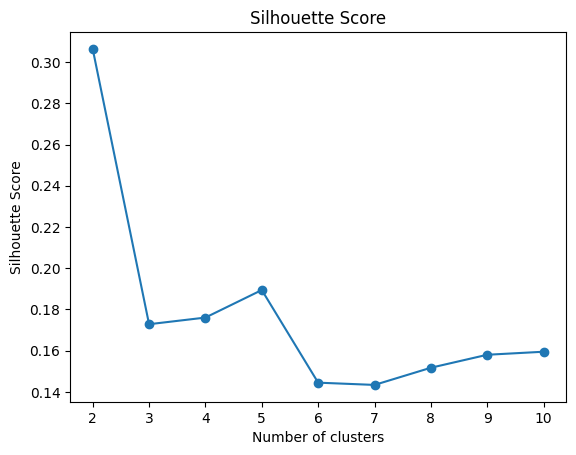

In [891]:
# The image below is not the final result, if yours looks different, that’s okay.
silhouette_scores = []
for i in range(2, 11):
    hierarchical = fcluster(linkage(df_scaled, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df_scaled, hierarchical)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.title('Silhouette Score')
plt.ylabel('Silhouette Score')
plt.show()

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [892]:
# agglomerative clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_scaled)

In [893]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
df_inverse['KMeans'] = y_pred
df_inverse['Agglo'] = y_hc

# show the df
df_inverse.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans,Agglo
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,0,1
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,2,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,0,0
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,0,0
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,0,0


Display the cluster summary in the form of a dataframe.

In [894]:
cluster_summary = df_inverse.groupby('Agglo').agg({
    'Area Category': [pd.Series.mode, 'min', 'max'],
    'Luas Tanah (m2)':  ['mean', 'std', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': [pd.Series.mode, 'min', 'max'],
    'Jumlah Kamar Mandi': [pd.Series.mode, 'min', 'max'],
    'Tingkat/Lantai ': [pd.Series.mode, 'min', 'max'],
})

# cluster_summary = cluster_summary.T

# cluster_summary.columns = [f'{i}' for i in range(cluster_summary.shape[1])]

# cluster_summary.columns.name = 'Agglo'

cluster_summary

Area Category           Luas Tanah (m2)                             \
               mode  min  max            mean         std    min     max   
Agglo                                                                      
0               2.0  1.0  4.0      511.848485  244.704987  170.0  1561.0   
1               2.0  1.0  4.0      163.090361   81.519198   34.0   450.0   
2               3.0  2.0  4.0      119.026316   89.201640   14.0   420.0   

      Luas Bangunan (m2)                            Jumlah Kamar             \
                    mean         std    min     max         mode  min   max   
Agglo                                                                         
0             572.484848  229.526083  120.0  1200.0          5.0  3.0  13.0   
1             218.156627  100.404996   50.0   600.0          4.0  2.0   8.0   
2             107.131579   69.677608   14.0   300.0          2.0  1.0   5.0   

      Jumlah Kamar Mandi            Tingkat/Lantai             
                    mode  min   max            mode  min  max  
Agglo                                                          
0                    5.0  2.0  13.0             2.0  1.0  4.0  
1                    4.0  1.0   7.0             2.0  1.0  3.0  
2                    1.0  1.0   4.0             1.0  1.0  2.0

In [895]:
cluster_summary = df_inverse.groupby('Agglo').agg({
    'Harga Penawaran (dari Owner)': ['mean', 'std', 'min', 'max'],
    'Terjual/Belum': [pd.Series.mode],
    'Arah Hadap Rumah': [pd.Series.mode],
    'Posisi Rumah': [pd.Series.mode],
    'Lebar Jalan Depan Rumah (ROW)': [pd.Series.mode]
})

cluster_summary

Harga Penawaran (dari Owner)                                           \
                              mean           std          min           max   
Agglo                                                                         
0                     1.383303e+10  1.448072e+10  325000000.0  9.900000e+10   
1                     3.094804e+09  2.060152e+09  645000000.0  1.450000e+10   
2                     1.548517e+09  1.712632e+09  160000000.0  1.050000e+10   

      Terjual/Belum Arah Hadap Rumah Posisi Rumah  \
               mode             mode         mode   
Agglo                                               
0               1.0              3.0          2.0   
1               1.0              3.0          2.0   
2               1.0              3.0          2.0   

      Lebar Jalan Depan Rumah (ROW)  
                               mode  
Agglo                                
0                               2.0  
1                               2.0  
2                               2.0

In [896]:
cluster_counts = df_inverse['Agglo'].value_counts().sort_index()

cluster_counts

,count
Agglo,
0,66
1,166
2,76


In [897]:
# write down your interpretation from the hierarchical cluster that you have been made

# Interpretation of Hierarchical Clustering Results

# Cluster 0:
# * Analyze the mean, standard deviation, minimum, and maximum values for features like 'Luas Tanah (m2)' and 'Luas Bangunan (m2)'.
# * Examine the mode values for categorical features like 'Area Category', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', and 'Lebar Jalan Depan Rumah (ROW)' to understand the typical characteristics of properties within this cluster.

# Cluster 1:
# * Perform a similar analysis as Cluster 0.
# * Look for differences in the mean values of 'Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Harga Penawaran (dari Owner)', and other relevant features to identify if properties in this cluster are distinct in terms of size, price, or other aspects.

# Cluster 2:
# * Analyze the summary statistics for this cluster.
# * Compare the mean and mode values of the features with the other clusters to see if this group has unique property attributes.


# Overall
# * The hierarchical clustering groups properties into distinct clusters based on their features.
# * By analyzing the characteristics within each cluster, you can identify potential patterns and insights into the property market.
# * For example, you might discover that properties in one cluster are larger, more expensive, and tend to be located in specific areas or have particular features.
# * These insights can be helpful for real estate investments, pricing strategies, marketing, or understanding regional property market trends.

**Hierarchical Visualization**

Single Linkage

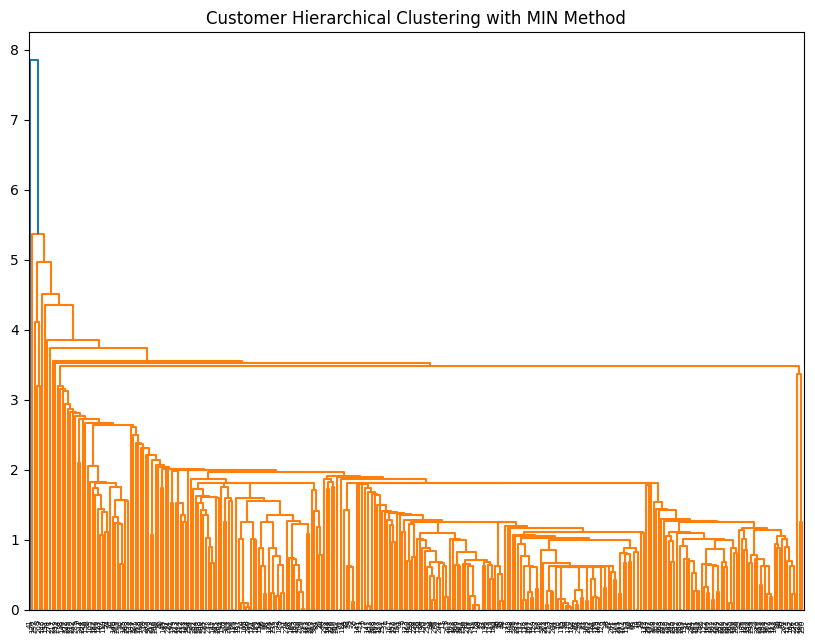

In [898]:
# Perform hierarchical clustering using the MIN Single linkage method
single_linkage = linkage(df_scaled, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 7.5))
dendrogram = sch.dendrogram(
    single_linkage,
    labels=list(range(1, len(df_scaled) + 1)),
)

plt.title('Customer Hierarchical Clustering with MIN Method')
plt.xticks(fontsize=5)
plt.show()

complete linkage

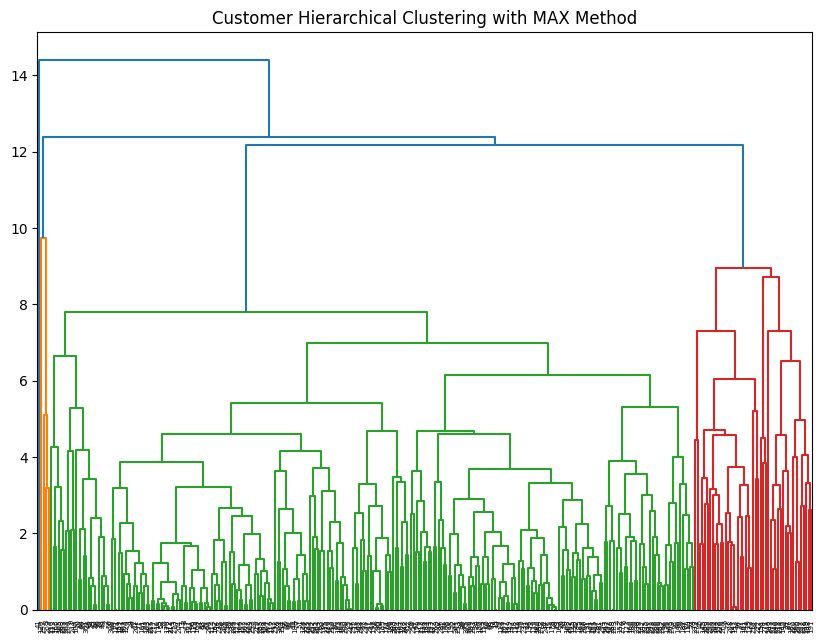

In [899]:
# Perform hierarchical clustering using the MAX Complete linkage method
complete_linkage = linkage(df_scaled, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 7.5))
dendrogram = sch.dendrogram(
    complete_linkage,
    labels=list(range(1, len(df_scaled) + 1)),
)

plt.title('Customer Hierarchical Clustering with MAX Method')
plt.xticks(fontsize=5)
plt.show()

average linkage

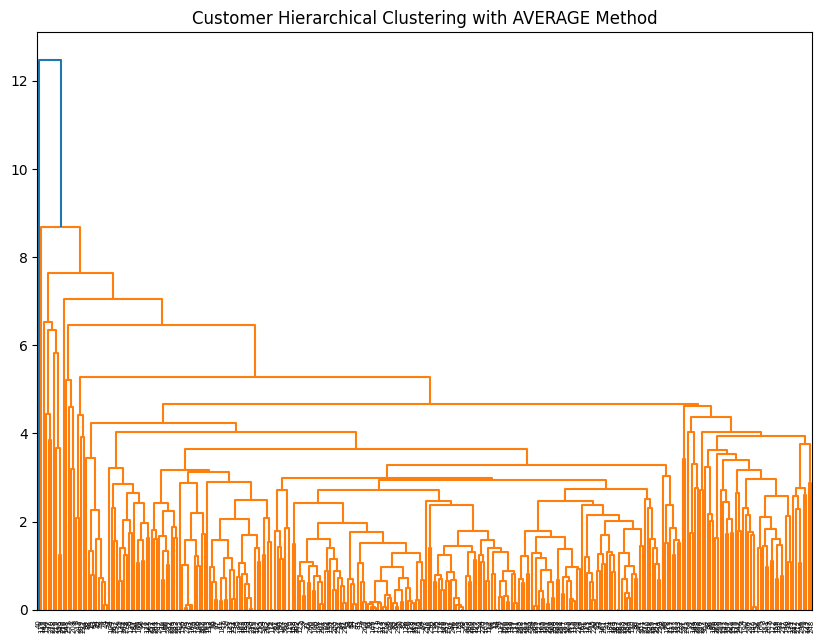

In [900]:
# Perform hierarchical clustering using the AVERAGE linkage method
average_linkage = linkage(df_scaled, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 7.5))
dendrogram = sch.dendrogram(
    average_linkage,
    leaf_rotation=90,
    leaf_font_size=5,
    color_threshold=0.7 * max(average_linkage[:, 2]),
)
plt.title("Customer Hierarchical Clustering with AVERAGE Method")
plt.xticks(fontsize=5)
plt.show()

ward method

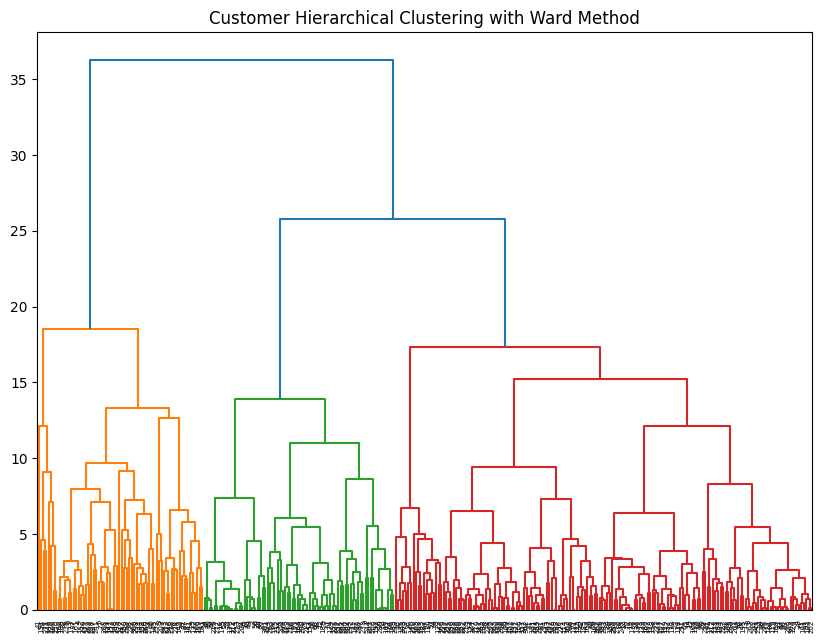

In [901]:
# Perform hierarchical clustering using the Ward linkage method

ward_linkage = linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7.5))
dendrogram = sch.dendrogram(
    ward_linkage,
    labels=list(range(1, len(df_scaled) + 1)),
)

plt.title('Customer Hierarchical Clustering with Ward Method')
plt.xticks(fontsize=5)
plt.show()